# Auto regulatory negative feedback vs. unregulated system
The model here is based on the paper of Becskei and Serrano (2000): http://www.nature.com/nature/journal/v405/n6786/full/405590a0.html

<img src='regulated and unregulated.png',width=500>

## Rate equations
The rate equations for the unregulated and negative feedback gene circuits are:

\begin{equation}
f_{unreg}(R)=\frac{dR}{dt}=\frac{nk_pPk_ia}{1+k_pP}-k_{deg}R\\
\end{equation}
\begin{equation}
f_{reg}(R)=\frac{dR}{dt}=\frac{nk_pPk_ia}{1+k_pP+k_rR}-k_{deg}R\\
\end{equation}

where $R$ is the repressor protein, $P$ is the concentration of the RNA polymerase, $k_p$ and $k_r$ are binding constants of the polymerase and repressor, $k_i$ is the isomerization rate from closed to initiating complex, $a$ is the proportionality constant between mRNA and protein concetration, $k_{deg}$ is the degradation rate of the repressor, and $n$ is the gene copy number.

Initial parameters and rate constants were given as:

In [3]:
import math
P=0.0000001
kp=1.5*math.pow(10,10)
ki=0.0000000003
n=3
a=3.3
kr=2*math.pow(10,11)
kdeg=math.pow(10,-5)

## Stability analysis
- Stability (S) was defined as the second derivative of the protein wrt time at steady-state. The second derivative refers to the concavity: S>0 (concave up) is more stable than S<0 (concave down).
- The ratio between the stability of the regulated and unregulated systems is S$_r$=S$_{reg}$/S$_{unreg}$.

In [4]:
import numpy as np
#Steady-state values of regulated and unregulated systems.
def R_reg_ss(P,kp,ki,n,a,kr,kdeg):
    return max((-(kdeg+kp*P*kdeg)+math.sqrt(math.pow(kdeg+kp*P*kdeg,2)+4*kr*kdeg*n*kp*P*ki*a))/(2*kr*kdeg),(-(kdeg+kp*P*kdeg)-math.sqrt(math.pow(kdeg+kp*P*kdeg,2)+4*kr*kdeg*n*kp*P*ki*a))/(2*kr*kdeg))
def R_unreg_ss(P,kp,ki,n,a,kr,kdeg):
    return (kp*P*n*ki*a)/((1+kp*P)*kdeg)
#Stability ratio (Sr) at steady-state.
def Sr(P,kp,ki,n,a,kr,kdeg):
    return (((n*kp*P*ki*a*kr)/math.pow(1+kp*P+kr*R_reg_ss(P,kp,ki,n,a,kr,kdeg),2))+kdeg)/kdeg

Figure 1A shows the stability ratio at variable $k_r$ (binding constant of the repressor protein to the DNA).

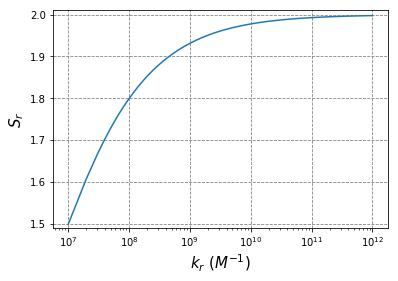

In [5]:
Sr_list_a=[]
kr_list=list(range(10000000,1000000000000,10000000))
for i in kr_list:
    Sr_list_a.append(Sr(P,kp,ki,n,a,i,kdeg))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(kr_list,Sr_list_a)
plt.xscale('log')
plt.ylim(1.49,2.01)
plt.xlabel('$k_r$ ($M^{-1}$)',size=15)
plt.ylabel('$S_r$',size=15)
plt.grid(b=True,which='major',color='grey',linestyle='--')
plt.show()

Figure 1B shows the stability ratio at variable values of k$_i$ at k$_{deg}$ $10^{-5}$ and $10^{-3}$. The results I got were not the same as the paper. The trend is the same but $S_r$ shoud be spread between 1 and 2. 

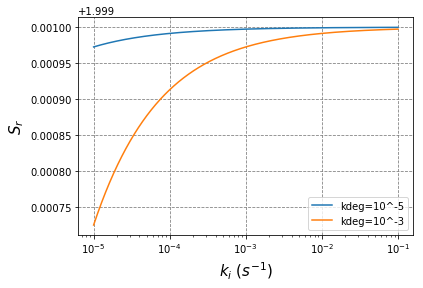

In [6]:
kdeg=math.pow(10,-5)
Sr_list_b=[]
ki_list=list(np.arange(0.00001,0.1,0.00000001))
for i in ki_list:
    Sr_list_b.append(Sr(P,kp,i,n,a,kr,kdeg))

kdeg=math.pow(10,-3)
Sr_list_c=[]
ki_list=list(np.arange(0.00001,0.1,0.0000001))
for i in ki_list:
    Sr_list_c.append(Sr(P,kp,i,n,a,kr,kdeg))

plt.plot(ki_list,Sr_list_b,label='kdeg=10^-5')
plt.plot(ki_list,Sr_list_c,label='kdeg=10^-3')
plt.xscale('log')
plt.xlabel('$k_i$ ($s^{-1}$)',size=15)
plt.ylabel('$S_r$',size=15)
plt.grid(b=True,which='major',color='grey',linestyle='--')
plt.legend()
plt.show()

## Numerical simulation
The Taylor expansion can estimate the decay rate of perturbations of the regulated and unregulated systems: $f(R^*+\eta)=f(R^*)+{\eta}f'(R^*)$, where $R^*$ is the steady-state value of R and $\eta$ is the perturbation. 

$f'(R^*)$ is the decay rate of the perturbation. The final steady state of the two systems are made to be equal so that variation can be directly compared. To do this, equate the two steady state ODEs and solve for the necessary promoter strength wrt the other:

\begin{equation}
f_{unreg}(R^*)=0=\frac{dR}{dt}=\frac{nk_pPk_{iunreg}a}{1+k_pP}-k_{deg}R^*\\
\end{equation}
\begin{equation}
f_{reg}(R^*)=0=\frac{dR}{dt}=\frac{nk_pPk_{ireg}a}{1+k_pP+k_rR^*}-k_{deg}R^*\\
\end{equation}
\begin{equation}
\frac{nk_pPk_{iunreg}a}{1+k_pP}-k_{deg}R^*=\frac{nk_pPk_{ireg}a}{1+k_pP+k_rR^*}-k_{deg}R^*\\
\end{equation}
\begin{equation}
k_{iunreg}=\frac{(nk_pPk_{ireg}a)(1+k_pP)}{(1+k_pP+k_rR^*)(nk_pPa)}\\
\end{equation}

In [45]:
#Second derivative at steady-state.
def dR2_reg(P,kp,ki,n,a,kr,kdeg):
    return (-1*(n*kp*P*ki*a*kr)/math.pow(1+kp*P+kr*R_reg_ss(P,kp,ki,n,a,kr,kdeg),2))-kdeg
def dR2_unreg(P,kp,ki,n,a,kr,kdeg):
    return -1*kdeg
#Random perturbations from steady-state.
def perturbation_reg(P,kp,ki,n,a,kr,kdeg):
    return np.random.uniform(-1,1)*R_reg_ss(P,kp,ki,n,a,kr,kdeg)
def perturbation_unreg(P,kp,ki,n,a,kr,kdeg):
    return np.random.uniform(-1,1)*R_unreg_ss(P,kp,ki,n,a,kr,kdeg)

Equating the steady states and the solving for the decay rates:

In [36]:
P=0.0000001
kp=1.5*math.pow(10,10)
n=3
a=3.3
kr=2*math.pow(10,11)
kdeg=math.pow(10,-5)
kireg=0.0000000003
Rregss=R_reg_ss(P,kp,kireg,n,a,kr,kdeg)
kiunreg=((n*kp*P*kireg*a)*(1+kp*P))/((1+kp*P+kr*Rregss)*(n*kp*P*a))
Runregss=R_unreg_ss(P,kp,kiunreg,n,a,kr,kdeg)

print ('Regulated decay rate: '+str(dR2_reg(P,kp,kireg,n,a,kr,kdeg)))
print ('Unregulated decay rate: '+str(dR2_unreg(P,kp,kiunreg,n,a,kr,kdeg)))

Regulated decay rate: -1.9949840880068482e-05
Unregulated decay rate: -1e-05


The decay rate of the regulated system is higher so that the regulated system should have less variability when perturbed. This should be seen when we simulate the regulated and unregulated systems.

\begin{equation}
f_{unreg}(R)=\frac{dR}{dt}=\frac{nk_pPk_ia}{1+k_pP}-k_{deg}R+\eta \\
\end{equation}
\begin{equation}
f_{reg}(R)=\frac{dR}{dt}=\frac{nk_pPk_ia}{1+k_pP+k_rR}-k_{deg}R+\eta \\
\end{equation}

where $\eta$ is a random perturbation that occurs during steady state.

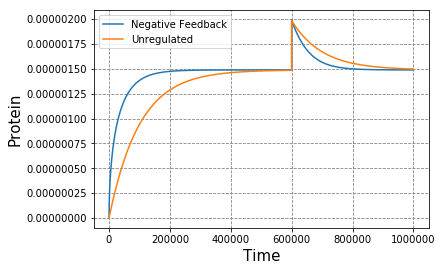

In [55]:
def dR_reg(P,kp,ki,n,a,kr,kdeg,R):
    return ((n*kp*P*ki*a)/(1+kp*P+kr*R[-1])-kdeg*R[-1])
def dR_unreg(P,kp,ki,n,a,kr,kdeg,R):
    return (kp*P*n*ki*a/(1+kp*P)-kdeg*R[-1])

reg_list=[0]
unreg_list=[0]
time_list=[0]
t_max=1000000
dt=1
while time_list[-1]<t_max:
    if time_list[-1]==600000:
        pert=0.0000005
    else:
        pert=0
    reg_list.append(reg_list[-1]+dR_reg(P,kp,kireg,n,a,kr,kdeg,reg_list)*dt+pert)
    unreg_list.append(unreg_list[-1]+dR_unreg(P,kp,kiunreg,n,a,kr,kdeg,unreg_list)*dt+pert)
    time_list.append(time_list[-1]+dt)

plt.plot(time_list,reg_list,label='Negative Feedback')
plt.plot(time_list,unreg_list,label='Unregulated')
plt.grid(b=True,which='major',color='grey',linestyle='--')
plt.xlabel('Time',size=15)
plt.ylabel('Protein',size=15)
plt.legend()
plt.show()